In [1]:
#importing neccesary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score
import warnings
warnings.simplefilter("ignore",UserWarning)

## Data importing

In [2]:
train_data=pd.read_excel("Data_Train.xlsx")
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [3]:
test_data=pd.read_excel("Test_set.xlsx")
test_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info


In [4]:
test_y=pd.read_excel("Sample_submission.xlsx")
test_y.head(2)

,Price
0,15998
1,16612


In [5]:
#concatentaion the two excel file
test_data=pd.concat([test_data,test_y],axis=1)
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,15998
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,16612
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,25572
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,25778
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,16934


In [6]:
train_data.shape , test_data.shape

((10683, 11), (2671, 11))

# EDA for training dataset

In [7]:
#checking the datatype of each feature
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
#checking the datatype of each feature
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
 10  Price            2671 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 229.7+ KB


In [9]:
#Checking for nan values
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
#Checking for nan values
test_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
#droping the nan value in the train data set
train_data.dropna(axis=0,inplace=True)

In [12]:
#droping the nan value in the test data set
test_data.dropna(axis=0,inplace=True)

In [13]:
#Checking for nan values
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
#Checking for nan values
test_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [15]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [16]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,15998
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,16612
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,25572
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,25778
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,16934


## Journey date feature changind to datetime function for train and test data to extract the day and month

In [17]:
train_data["Journey_date"]=pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.day
train_data["Journey_month"]=pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.month
train_data.drop("Date_of_Journey",axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [18]:
test_data["Journey_date"]=pd.to_datetime(test_data["Date_of_Journey"],format="%d/%m/%Y").dt.day
test_data["Journey_month"]=pd.to_datetime(test_data["Date_of_Journey"],format="%d/%m/%Y").dt.month
test_data.drop("Date_of_Journey",axis=1,inplace=True)
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,15998,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,16612,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,25572,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,25778,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,16934,24,6


## Arrival_date feature change to datetime function on train and test data to extrach the day and month

In [19]:
train_data["Arrival_date"]=pd.to_datetime(train_data["Arrival_Time"]).dt.day
train_data["Arrival_month"]=pd.to_datetime(train_data["Arrival_Time"]).dt.month
train_data.drop("Arrival_Time",axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arrival_date,Arrival_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,22,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,18,11
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,10,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,18,11
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,18,11


In [20]:
test_data["Arrival_date"]=pd.to_datetime(test_data["Arrival_Time"]).dt.day
test_data["Arrival_month"]=pd.to_datetime(test_data["Arrival_Time"]).dt.month
test_data.drop("Arrival_Time",axis=1,inplace=True)
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arrival_date,Arrival_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,10h 55m,1 stop,No info,15998,6,6,7,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,4h,1 stop,No info,16612,12,5,18,11
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,23h 45m,1 stop,In-flight meal not included,25572,21,5,22,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,13h,1 stop,No info,25778,21,5,18,11
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,2h 50m,non-stop,No info,16934,24,6,25,6


## depature_time feature is change to datetime function on train and test data to extract the hour and minute

In [21]:
train_data["dep_hour"]=pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["dep_minute"]=pd.to_datetime(train_data["Dep_Time"]).dt.minute
train_data.drop("Dep_Time",axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arrival_date,Arrival_month,dep_hour,dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,18,11,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,10,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,11,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,18,11,16,50


In [22]:
test_data["dep_hour"]=pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["dep_minute"]=pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop("Dep_Time",axis=1,inplace=True)
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arrival_date,Arrival_month,dep_hour,dep_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,15998,6,6,7,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,16612,12,5,18,11,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,25572,21,5,22,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,25778,21,5,18,11,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,16934,24,6,25,6,23,55


In [23]:
#function for cleaning the duration minute
def minute(x):
    try:
        a=x.split(" ")
        return a[1]
    except:
        return 0

## Duration feature is split(" ") and take the 1st element as hour and 2nd element as minute for train and test data

In [24]:
train_data["Duration_hour"]=train_data["Duration"].apply(lambda x: x.split(" ")[0])
train_data["Duration_minute"]=train_data["Duration"].apply(minute)
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arrival_date,Arrival_month,dep_hour,dep_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,3,22,20,2h,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,18,11,5,50,7h,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,10,6,9,25,19h,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,11,18,5,5h,25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,18,11,16,50,4h,45m


In [25]:
test_data["Duration_hour"]=test_data["Duration"].apply(lambda x: x.split(" ")[0])
test_data["Duration_minute"]=test_data["Duration"].apply(minute)
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arrival_date,Arrival_month,dep_hour,dep_minute,Duration_hour,Duration_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,15998,6,6,7,6,17,30,10h,55m
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,16612,12,5,18,11,6,20,4h,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,25572,21,5,22,5,19,15,23h,45m
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,25778,21,5,18,11,8,0,13h,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,16934,24,6,25,6,23,55,2h,50m


In [26]:
#function for cleaning the duration hour and minute and take only the number(digit)
def number(x):
    n=[]
    for i in x:
        if i.isdigit():
            n.append(i)
    return "".join(n)

In [27]:
#Duration_minute changing the datatype to str
train_data["Duration_minute"]=train_data["Duration_minute"].astype("str")
test_data["Duration_minute"]=test_data["Duration_minute"].astype("str")

## Duration hour and minute feature extraction the digit for it using function to train and test data

In [28]:
train_data["Duration_hour"]=train_data["Duration_hour"].apply(number)
train_data["Duration_minute"]=train_data["Duration_minute"].apply(number)
train_data.drop("Duration",axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arrival_date,Arrival_month,dep_hour,dep_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,3,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,18,11,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,10,6,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,11,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,18,11,16,50,4,45


In [29]:
test_data["Duration_hour"]=test_data["Duration_hour"].apply(number)
test_data["Duration_minute"]=test_data["Duration_minute"].apply(number)
test_data.drop("Duration",axis=1,inplace=True)
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arrival_date,Arrival_month,dep_hour,dep_minute,Duration_hour,Duration_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,15998,6,6,7,6,17,30,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,16612,12,5,18,11,6,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,25572,21,5,22,5,19,15,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,25778,21,5,18,11,8,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,16934,24,6,25,6,23,55,2,50


## Dropping the extra feature on train and test data 

In [30]:
train_data.drop(["Additional_Info","Route"],axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Arrival_date,Arrival_month,dep_hour,dep_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,3,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,18,11,5,50,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,10,6,9,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,11,18,5,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,18,11,16,50,4,45


In [31]:
test_data.drop(["Additional_Info","Route"],axis=1,inplace=True)
test_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Arrival_date,Arrival_month,dep_hour,dep_minute,Duration_hour,Duration_minute
0,Jet Airways,Delhi,Cochin,1 stop,15998,6,6,7,6,17,30,10,55
1,IndiGo,Kolkata,Banglore,1 stop,16612,12,5,18,11,6,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,25572,21,5,22,5,19,15,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,25778,21,5,18,11,8,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,16934,24,6,25,6,23,55,2,50


## Changing the duration feature to_numerical to avoid the get_dummies(onehotencoding) on duration feature

In [32]:
train_data["Duration_minute"]=pd.to_numeric(train_data["Duration_minute"])
test_data["Duration_minute"]=pd.to_numeric(test_data["Duration_minute"])
train_data["Duration_hour"]=pd.to_numeric(train_data["Duration_hour"])
test_data["Duration_hour"]=pd.to_numeric(test_data["Duration_hour"])

# Evaluting the Categorical value

## Checking all the Categorical value 

In [33]:
train_data["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [34]:
test_data["Airline"].unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

In [35]:
train_data["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [36]:
test_data["Source"].unique()

array(['Delhi', 'Kolkata', 'Banglore', 'Mumbai', 'Chennai'], dtype=object)

In [37]:
train_data["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [38]:
test_data["Destination"].unique()

array(['Cochin', 'Banglore', 'Delhi', 'New Delhi', 'Hyderabad', 'Kolkata'],
      dtype=object)

In [39]:
train_data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [40]:
test_data["Total_Stops"].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

## Categorical value of total_stop feature changing to numerical values using replace method

In [41]:
train_data["Total_Stops"].replace({
    "non-stop":0,
    '1 stop':1,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4
},inplace=True)

In [42]:
test_data["Total_Stops"].replace({
    "non-stop":0,
    '1 stop':1,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4
},inplace=True)

## Remaining Categorical value are converted to numerical value by oneHotEncoding technique

In [43]:
train_data=pd.get_dummies(train_data,drop_first=True)
train_data.head()

,Total_Stops,Price,Journey_date,Journey_month,Arrival_date,Arrival_month,dep_hour,dep_minute,Duration_hour,Duration_minute,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,3,22,20,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,18,11,5,50,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,10,6,9,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,11,18,5,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,18,11,16,50,4,45,...,0,0,0,0,0,0,0,0,0,1


In [44]:
test_data=pd.get_dummies(test_data,drop_first=True)
test_data.head()

,Total_Stops,Price,Journey_date,Journey_month,Arrival_date,Arrival_month,dep_hour,dep_minute,Duration_hour,Duration_minute,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,15998,6,6,7,6,17,30,10,55,...,0,0,1,0,0,1,0,0,0,0
1,1,16612,12,5,18,11,6,20,4,0,...,0,0,0,1,0,0,0,0,0,0
2,1,25572,21,5,22,5,19,15,23,45,...,0,0,1,0,0,1,0,0,0,0
3,1,25778,21,5,18,11,8,0,13,0,...,0,0,1,0,0,1,0,0,0,0
4,0,16934,24,6,25,6,23,55,2,50,...,0,0,0,0,0,0,1,0,0,0


In [45]:
train_data.shape , test_data.shape

((10682, 30), (2671, 29))

# Model Buliding

### Split the dependent and independent feature

In [46]:
X=train_data.drop("Price",axis=1)
Y=train_data[["Price"]]
X.shape, Y.shape

((10682, 29), (10682, 1))

## Performing train_test_split for training 70% of train data and 30% for testing in train data

In [47]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

## RandomForestRegressor model is using for the development

In [48]:
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

### Once the model is bulit then predict the value of x_test and store in the y_pred for checking the mean_absolute_error with y_test

In [49]:
y_pred=model.predict(x_test)

## Checkibg the R2_score for the model

In [50]:
r2_score(y_test,y_pred)

0.7939161816603548

## Model score is calculated for training and test data 

In [51]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.954880294887577
0.7939161816603548


## By the score of training and test data the overfitting is there in the model

## Checking the error on predicting and original data using mean_absolute_error

In [52]:
mean_absolute_error(y_test,y_pred)

1202.2272179960705

## Plotting the y_test and prediction of x_test

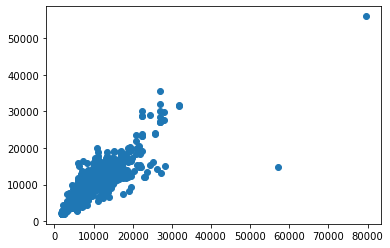

In [53]:
plt.scatter(y_test,y_pred)

## The plot is pretty good and model prediction is good

# Conclusion

# The model is RandomForestRegressor with the training score of 95% and test score is 80% With the R2_score 80% and the mean_absolute_error is 1202 